In [241]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, classification_report, f1_score, recall_score
import math
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [242]:
data = pd.read_csv('Data/25day_dataset.csv')

In [243]:
label = []
for i in range(len(data)):
    if data['wahing_machine'].iloc[i]==0 and data['dishwasher'].iloc[i]==0 and data['oven'].iloc[i]==0:
        label.append(0)
    elif data['wahing_machine'].iloc[i]>0:
        label.append(1)
    elif data['dishwasher'].iloc[i]>0:
        label.append(2)
    elif data['oven'].iloc[i]>0:
        label.append(3)
data['Class'] = label

In [244]:
X = data.iloc[:,1:13]
std_scl = StandardScaler()
X_std = std_scl.fit_transform(X)

pca = decomposition.PCA(n_components=5)

In [245]:
X_std_pca = pca.fit_transform(X)
print(X_std_pca.shape)
X_std_pca

(2160000, 5)


array([[-3.32635090e-02, -2.21091714e-02,  1.54803726e-05,
        -1.66584139e-06, -8.74283196e-07],
       [-3.31499610e-02, -2.13299877e-02,  1.46218794e-05,
        -1.65503948e-06,  3.41941071e-07],
       [-3.33662454e-02, -2.13204064e-02,  1.46249627e-05,
        -1.19585152e-06, -1.36144408e-06],
       ...,
       [-3.59627489e-02, -9.51311195e-03, -1.57876431e-05,
        -1.33312769e-05,  6.22158555e-07],
       [-3.60485906e-02, -8.36350003e-03, -1.69295389e-05,
        -1.33639520e-05, -2.44556782e-06],
       [-3.58502003e-02, -9.26805096e-03, -1.69208870e-05,
        -1.21253154e-05, -2.01124765e-06]])

In [246]:
pd.concat([data, pd.DataFrame(X_std_pca)], axis=1)

,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,...,harmonic7_Imaginary,wahing_machine,dishwasher,oven,Class,0,1,2,3,4
0,2022-01-01 00:00:00,0.019520,0.035852,0.000165,0.000253,0.000011,-0.000271,0.000009,-0.000054,-0.000013,...,-0.000011,0.0,0.0,0.0,0,-0.033264,-0.022109,0.000015,-0.000002,-8.742832e-07
1,2022-01-01 00:00:01,0.019627,0.036632,0.000165,0.000254,0.000010,-0.000273,0.000009,-0.000055,-0.000013,...,-0.000011,0.0,0.0,0.0,0,-0.033150,-0.021330,0.000015,-0.000002,3.419411e-07
2,2022-01-01 00:00:02,0.019411,0.036640,0.000165,0.000252,0.000010,-0.000268,0.000008,-0.000054,-0.000013,...,-0.000016,0.0,0.0,0.0,0,-0.033366,-0.021320,0.000015,-0.000001,-1.361444e-06
3,2022-01-01 00:00:03,0.019411,0.036637,0.000165,0.000252,0.000012,-0.000268,0.000008,-0.000053,-0.000013,...,-0.000009,0.0,0.0,0.0,0,-0.033366,-0.021324,0.000013,-0.000003,-1.902226e-06
4,2022-01-01 00:00:04,0.019735,0.036645,0.000165,0.000256,0.000013,-0.000277,0.000009,-0.000056,-0.000013,...,-0.000017,0.0,0.0,0.0,0,-0.033042,-0.021318,0.000011,-0.000001,2.561898e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159995,2022-01-25 23:59:55,0.016614,0.049226,0.000163,0.000217,0.000021,-0.000233,0.000011,-0.000045,-0.000011,...,-0.000007,0.0,0.0,0.0,0,-0.036054,-0.008711,-0.000018,-0.000014,-5.394417e-07
2159996,2022-01-25 23:59:56,0.016512,0.050061,0.000163,0.000216,0.000021,-0.000232,0.000011,-0.000044,-0.000011,...,-0.000006,0.0,0.0,0.0,0,-0.036149,-0.007875,-0.000019,-0.000015,-7.041270e-07
2159997,2022-01-25 23:59:57,0.016713,0.048425,0.000163,0.000219,0.000020,-0.000236,0.000011,-0.000046,-0.000011,...,-0.000009,0.0,0.0,0.0,0,-0.035963,-0.009513,-0.000016,-0.000013,6.221586e-07
2159998,2022-01-25 23:59:58,0.016617,0.049573,0.000163,0.000217,0.000020,-0.000231,0.000011,-0.000044,-0.000011,...,-0.000008,0.0,0.0,0.0,0,-0.036049,-0.008364,-0.000017,-0.000013,-2.445568e-06


In [247]:
X = data.drop(['DateTime', 'Class', 'wahing_machine', 'dishwasher', 'oven'], axis=1)
y = data.Class
#Scelgo le feature con correlazione piu alta per il Clustering
features = ['ActivePower','ReactivePower','harmonic3_Real','harmonic5_Real','harmonic1_Real', 'harmonic5_Imaginary', 'Current']#,'harmonic1_Imaginary','harmonic3_Imaginary','harmonic7_Real','harmonic7_Imaginary', 'Voltage']


# Standardize??
X_scaled = X.loc[:, features]
#X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)


In [147]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)


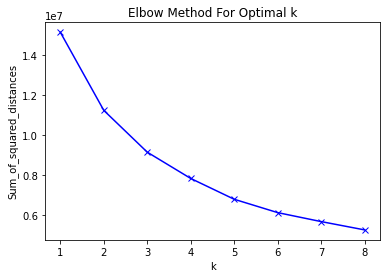

In [148]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [248]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"] = X["Cluster"].astype('category')

In [249]:
X_cd = kmeans.fit_transform(X_scaled)

In [250]:
# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = pd.concat([X, X_cd], axis=1)

In [251]:
print(len(X.loc[X.Cluster==0]))
print(len(X.loc[X.Cluster==1]))
print(len(X.loc[X.Cluster==2]))
print(len(X.loc[X.Cluster==3]))
print(len(X.loc[X.Cluster==4]))

1229458
99092
42202
540872
248376


In [252]:
data['Cluster']= X.Cluster
for col in X_cd:
    data[f'{col}']= X_cd[col]  

In [253]:
Test_set1 =data[data['DateTime'].str.startswith('2022-01-01')]
Test_set2 =data[data['DateTime'].str.startswith('2022-01-02')]
Test_set3 =data[data['DateTime'].str.startswith('2022-01-03')]
Test_set4 =data[data['DateTime'].str.startswith('2022-01-04')]
Test_set5 =data[data['DateTime'].str.startswith('2022-01-05')]
Test_set6 =data[data['DateTime'].str.startswith('2022-01-06')]
Test_set7 =data[data['DateTime'].str.startswith('2022-01-07')]
Test_set8 =data[(data['DateTime'].str.startswith('2022-01-08')) | (data['DateTime'].str.startswith('2022-01-09'))]
Test_set9 =data[(data['DateTime'].str.startswith('2022-01-10')) | (data['DateTime'].str.startswith('2022-01-11'))]
Test_set10 =data[(data['DateTime'].str.startswith('2022-01-12')) | (data['DateTime'].str.startswith('2022-01-13'))]
test_set_list= [Test_set1, Test_set2, Test_set3, Test_set4, Test_set5, Test_set6, Test_set7, Test_set8, Test_set9, Test_set10]

In [256]:
#Oversample pesante su classi minoritarie

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
f_score={}
recall={}
for i in range(0,9):
    #Crea il Training set togliendo dal dataset il Test set
    Test_set= test_set_list[i]
    Training_set= data.drop(Test_set.index, axis=0)
    
    #Preprocessing sul Training set 
    #active_Power_Preprocessing(Training_set, 0.001) #Peggiora le performance
    #all_Off_Preprocessing(Training_set) #Peggiora le performance
    #Training_set= percentile_Preprocessing(Training_set) #MEH
    
    #Assegna x e y di training togliendo le colonne non utili
    X_train= Training_set.drop(['DateTime', 'Class', 'wahing_machine', 'dishwasher', 'oven'], axis=1)
    y_train= Training_set.Class
    
    #Fai oversampling per arrivare a 80000 campioni circa per classe
    n= 100000#(y.values == 0).sum()
    one=int((y_train.values == 1).sum())
    two= int((y_train.values == 2).sum())
    three= int((y_train.values == 3).sum())
    print("start undersampling")
    undersample = RandomUnderSampler(sampling_strategy={0: n, 1: one, 2: two, 3: three})
    print("stop undersampling")
    #over = RandomOverSampler(sampling_strategy={0: n, 1: one, 2: two, 3: three})
    X_, y_ = undersample.fit_resample(X_train, y_train)
    
    #Fai undersample per la prima classe in modo da ottenere un training set bilanciato
    #one= int((y.values == 1).sum()*0.5) #migliora f score abbassare i campioni calsse 1
    print("start oversampling")
    over = RandomOverSampler(sampling_strategy='auto')
    X_new, y_new = over.fit_resample(X_, y_)
    print("stop Oversampling")
    #Fitta il modello con una RandomForest
    clf = RandomForestClassifier(max_depth=20, n_estimators=40, max_features=None)
    clf.fit(X_new, y_new)
    y_preds= clf.predict(Test_set.drop(['DateTime','Class', 'wahing_machine', 'dishwasher', 'oven'], axis=1))
    
    #Stampa le statistiche per la fold e memorizza le metriche di f1score e recall
    print("CM:\n" + str(confusion_matrix(Test_set.Class,y_preds)) + "\n")
    print(classification_report(Test_set.Class,y_preds))
    r = recall_score(Test_set.Class,y_preds, average= None) 
    f = f1_score(Test_set.Class,y_preds, average= None)
    f_score[i] = f
    recall[i] = r 
    
end = time.time()
print(f"Time elapsed: {end - start}")

start undersampling
stop undersampling
start oversampling
stop Oversampling
CM:
[[79301   778  1335   251]
 [  112  3807   112    22]
 [    0     0     0     0]
 [   90     8     0   584]]

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     81665
           1       0.83      0.94      0.88      4053
           2       0.00      0.00      0.00         0
           3       0.68      0.86      0.76       682

    accuracy                           0.97     86400
   macro avg       0.63      0.69      0.66     86400
weighted avg       0.99      0.97      0.98     86400



C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

start undersampling
stop undersampling
start oversampling
stop Oversampling
CM:
[[75959  1277   587   446]
 [  298  6706     4     0]
 [    0     0     0     0]
 [   65     0     0  1058]]

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     78269
           1       0.84      0.96      0.89      7008
           2       0.00      0.00      0.00         0
           3       0.70      0.94      0.81      1123

    accuracy                           0.97     86400
   macro avg       0.63      0.72      0.67     86400
weighted avg       0.98      0.97      0.97     86400



C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

start undersampling
stop undersampling
start oversampling
stop Oversampling
CM:
[[69074 10625   607   789]
 [   19  1004     0     1]
 [ 1058    31  2486     2]
 [    0    37     0   667]]

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     81095
           1       0.09      0.98      0.16      1024
           2       0.80      0.69      0.75      3577
           3       0.46      0.95      0.62       704

    accuracy                           0.85     86400
   macro avg       0.58      0.87      0.61     86400
weighted avg       0.96      0.85      0.90     86400

start undersampling
stop undersampling
start oversampling
stop Oversampling
CM:
[[80603   618   508    26]
 [    0     0     0     0]
 [    0     0     0     0]
 [  595  1332     0  2718]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     81755
           1       0.00      0.00      0.00         0
           2       0.0

C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

start undersampling
stop undersampling
start oversampling
stop Oversampling
CM:
[[81810   860    61     4]
 [  118  3530     0    17]
 [    0     0     0     0]
 [    0     0     0     0]]

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     82735
           1       0.80      0.96      0.88      3665
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.99     86400
   macro avg       0.45      0.49      0.47     86400
weighted avg       0.99      0.99      0.99     86400



C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

start undersampling
stop undersampling
start oversampling
stop Oversampling
CM:
[[78983  3258   142    39]
 [    0     0     0     0]
 [  324   829  2823     2]
 [    0     0     0     0]]

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     82422
           1       0.00      0.00      0.00         0
           2       0.95      0.71      0.81      3978
           3       0.00      0.00      0.00         0

    accuracy                           0.95     86400
   macro avg       0.49      0.42      0.45     86400
weighted avg       0.99      0.95      0.97     86400



C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

start undersampling
stop undersampling
start oversampling
stop Oversampling
CM:
[[79245   890   656   165]
 [  188  3070     0     0]
 [    0     0     0     0]
 [  619    27     0  1540]]

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     80956
           1       0.77      0.94      0.85      3258
           2       0.00      0.00      0.00         0
           3       0.90      0.70      0.79      2186

    accuracy                           0.97     86400
   macro avg       0.67      0.66      0.66     86400
weighted avg       0.98      0.97      0.97     86400



C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

start undersampling
stop undersampling
start oversampling
stop Oversampling
CM:
[[156717   1865   1401    934]
 [   367   7073      4      0]
 [   923    352   2358      0]
 [   342     41      0    423]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    160917
           1       0.76      0.95      0.84      7444
           2       0.63      0.65      0.64      3633
           3       0.31      0.52      0.39       806

    accuracy                           0.96    172800
   macro avg       0.67      0.77      0.71    172800
weighted avg       0.97      0.96      0.97    172800

start undersampling
stop undersampling
start oversampling
stop Oversampling
CM:
[[164144   2829    750    508]
 [    88   2693      8      1]
 [     0      0      0      0]
 [   622     16      0   1141]]



C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    168231
           1       0.49      0.97      0.65      2790
           2       0.00      0.00      0.00         0
           3       0.69      0.64      0.67      1779

    accuracy                           0.97    172800
   macro avg       0.54      0.65      0.57    172800
weighted avg       0.98      0.97      0.98    172800

Time elapsed: 866.7935483455658


C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\massi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [257]:
import numpy as np
d= pd.DataFrame.from_dict(f_score, orient='index').replace(0, np.nan)
print(d.mean(axis=0, skipna=True))
d= pd.DataFrame.from_dict(recall, orient='index').replace(0, np.nan)
d.mean(axis=0, skipna=True)

0    0.976840
1    0.735304
2    0.732087
3    0.680719
dtype: float64


0    0.961642
1    0.956791
2    0.684566
3    0.743097
dtype: float64